In [2]:
%store -r electric_vehicle_df
%store -r charging_stations_df

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

### Does there exist a correlation between charging ports and number of EV's owned per city?

First a quick refresh of the datasets and the explore graphs

In [4]:
electric_vehicle_df.head()

,Postal Code,County,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,98103.0,King,Seattle,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,98011.0,King,Bothell,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,98908.0,Yakima,Yakima,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PACIFICORP
3,98034.0,King,Kirkland,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,98501.0,Thurston,Olympia,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC


In [5]:
charging_stations_df.head()

,City,ZIP,EV Network,EV Connector Types,EV Workplace Charging
0,Lacey,98503,Non-Networked,J1772,False
1,Seattle,98188,Non-Networked,NEMA520,False
2,Spokane,99252,Non-Networked,J1772 NEMA520,False
3,Spokane,99201,Non-Networked,J1772,False
4,Bellevue,98004,ChargePoint Network,J1772,False


Seattle                 565
Bellevue                270
Tacoma                  101
Spokane                  58
Vancouver                57
                       ... 
Steilacoom                1
University Place          1
SPOKANE                   1
Tulalip                   1
8900 E. Buckeye Ave.      1
Name: City, Length: 226, dtype: int64


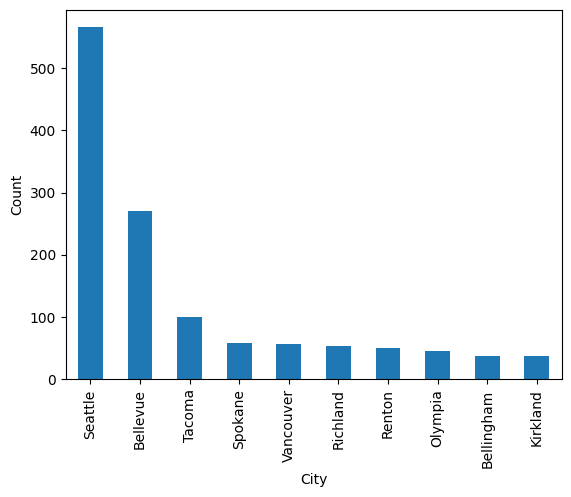

In [6]:
#Counties with the most amount of charging ports

charging_stations_category_counts = charging_stations_df['City'].value_counts()
print(charging_stations_category_counts)
#Top 10 counties
category_counts = charging_stations_category_counts.head(10)
category_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

Seattle      25675
Bellevue      7690
Redmond       5501
Vancouver     5310
Bothell       4861
             ...  
Beaver           1
Rosburg          1
Startup          1
Alderdale        1
Hamilton         1
Name: City, Length: 461, dtype: int64


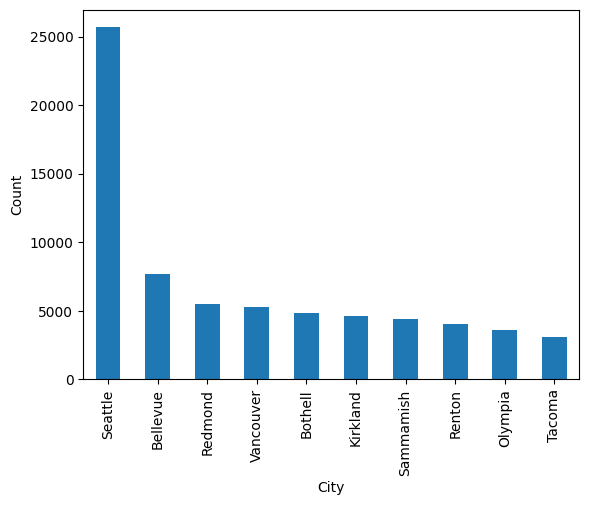

In [7]:
#Find counties with most amount of EV

ev_category_counts = electric_vehicle_df['City'].value_counts()
print(ev_category_counts)
#Top 10 counties
category_counts = ev_category_counts.head(10)
category_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

Off of first glance there appears to be a correlation.

In [8]:
correlation = ev_category_counts.corr(charging_stations_category_counts)

print("Correlation between Charging Ports and EV by City is", correlation)

Correlation between Charging Ports and EV by City is 0.9298778444631608


In [9]:
ev_category_counts.index

Index(['Seattle', 'Bellevue', 'Redmond', 'Vancouver', 'Bothell', 'Kirkland',
       'Sammamish', 'Renton', 'Olympia', 'Tacoma',
       ...
       'Waverly', 'Centerville', 'McCleary', 'Hartline', 'Bell Hill', 'Beaver',
       'Rosburg', 'Startup', 'Alderdale', 'Hamilton'],
      dtype='object', length=461)

In [10]:
charging_stations_category_counts.index

Index(['Seattle', 'Bellevue', 'Tacoma', 'Spokane', 'Vancouver', 'Richland',
       'Renton', 'Olympia', 'Bellingham', 'Kirkland',
       ...
       'Longmire', 'Prosser', 'Medical Lake', 'West Seattle', 'Camano',
       'Steilacoom', 'University Place', 'SPOKANE', 'Tulalip',
       '8900 E. Buckeye Ave.'],
      dtype='object', length=226)

In [11]:
charging_stations_category_counts.index = charging_stations_category_counts.index.str.lower()
ev_category_counts.index = ev_category_counts.index.str.lower()

In [12]:
# Change to dataframes to merge
charging_stations_category_counts = pd.DataFrame(charging_stations_category_counts)
ev_category_counts = pd.DataFrame(ev_category_counts)

# Add the index as a column
charging_stations_category_counts.reset_index(inplace=True)
ev_category_counts.reset_index(inplace=True)

In [13]:
# Rename columns to make more sense
charging_stations_category_counts.columns = ['City', 'Ports_Count']
ev_category_counts.columns = ['City', 'EV_Count']

In [14]:
charging_stations_category_counts

,City,Ports_Count
0,seattle,565
1,bellevue,270
2,tacoma,101
3,spokane,58
4,vancouver,57
...,...,...
221,steilacoom,1
222,university place,1
223,spokane,1
224,tulalip,1


In [15]:
ev_category_counts

,City,EV_Count
0,seattle,25675
1,bellevue,7690
2,redmond,5501
3,vancouver,5310
4,bothell,4861
...,...,...
456,beaver,1
457,rosburg,1
458,startup,1
459,alderdale,1


In [16]:
# Merge pd.Series to dataframe

df = ev_category_counts.merge(charging_stations_category_counts, on="City", how='outer')
df.drop_duplicates(subset=['City'], keep='first', inplace=True, ignore_index=True)
df.fillna(0, inplace=True)

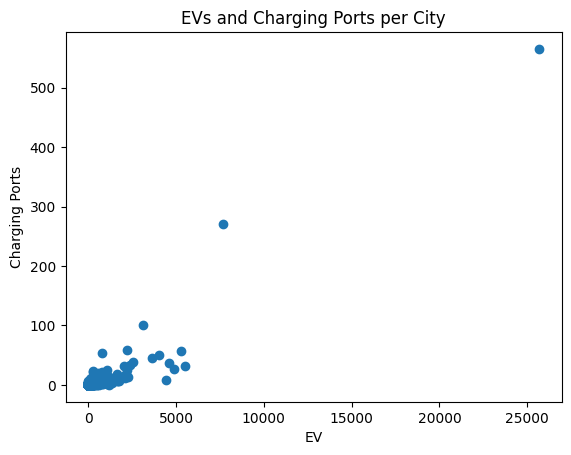

In [17]:
# Scatter Plot

plt.scatter(df.EV_Count, df.Ports_Count)
plt.xlabel('EV')
plt.ylabel('Charging Ports')
plt.title('EVs and Charging Ports per City')
plt.show()

In [18]:
# Get the P value

correlation_coefficient, p_value = pearsonr(df.EV_Count, df.Ports_Count)
print('The correlation according the pearson r test is ', correlation_coefficient, ' with the p value being ', p_value)

if p_value > .05:
    print('We can conclude the correlation is not significant')
else:
    print('We can conclude the correlation is significant')

The correlation according the pearson r test is  0.9305341342162305  with the p value being  1.513444743544629e-211
We can conclude the correlation is significant


In [19]:
# Create a linear regression model

model = LinearRegression()
model.fit(df.EV_Count.values.reshape(-1, 1), df.Ports_Count)
predictions = model.predict(df.EV_Count.values.reshape(-1, 1))

In [20]:
# Mean Squared Error
mse = mean_squared_error(df.Ports_Count.values, predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(df.Ports_Count.values, predictions)

# R-squared
r_squared = r2_score(df.Ports_Count.values, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)

if r_squared > .7:
    print('The R-squared metric indicates the model is a good fit.')
elif r_squared > .4:
    print('The R-squared metric indicates the model could have a better fit.')
else:
    print('The R-squared metric indicates the model is not a suitable fit.')

Mean Squared Error: 117.2869992941702
Root Mean Squared Error: 10.829912247759452
Mean Absolute Error: 4.223984137512639
R-squared: 0.8658937749415464
The R-squared metric indicates the model is a good fit.


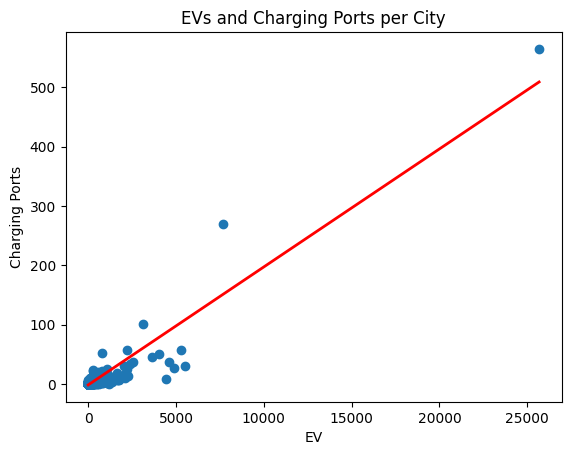

In [21]:
# Scatter Plot

plt.scatter(df.EV_Count, df.Ports_Count)
plt.xlabel('EV')
plt.ylabel('Charging Ports')
plt.title('EVs and Charging Ports per City')

# Overlay the regression line
plt.plot(df['EV_Count'], predictions, color='red', linewidth=2)
plt.show()

Please note the above predictions and linear regression are attempting to predict the charging ports per city based on the number of EV's per city. This is NOT meant to imply that the number EV's or ports per city are the cause of the correlation, but rather to further explore their correlation.

### Below tests the above process again, this time without the outliers

In [23]:
charging_stations_category_counts = charging_stations_df['City'].value_counts()
ev_category_counts = electric_vehicle_df['City'].value_counts()

charging_stations_category_counts.index = charging_stations_category_counts.index.str.lower()
ev_category_counts.index = ev_category_counts.index.str.lower()

In [24]:
# Checking for outliers with Ports
z_scores = stats.zscore(df.Ports_Count)
port_outliers = (z_scores < -3) | (z_scores > 3)

# Checking for outliers with EVs
z_scores = stats.zscore(df.EV_Count)
ev_outliers = (z_scores < -3) | (z_scores > 3)

In [28]:
# Change to dataframes to merge
charging_stations_category_counts = pd.DataFrame(charging_stations_category_counts)
ev_category_counts = pd.DataFrame(ev_category_counts)

# Add the index as a column
charging_stations_category_counts.reset_index(inplace=True)
ev_category_counts.reset_index(inplace=True)

# Rename columns to make more sense
charging_stations_category_counts.columns = ['City', 'Ports_Count']
ev_category_counts.columns = ['City', 'EV_Count']

In [30]:
# Drop the outliers
ev_category_counts = ev_category_counts[~ev_outliers]
charging_stations_category_counts = charging_stations_category_counts[~port_outliers]

C:\Users\riley\AppData\Local\Temp\ipykernel_28316\991410229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ev_category_counts = ev_category_counts[~ev_outliers]
C:\Users\riley\AppData\Local\Temp\ipykernel_28316\991410229.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  charging_stations_category_counts = charging_stations_category_counts[~port_outliers]


In [31]:
# Merge pd.Series to dataframe

df = ev_category_counts.merge(charging_stations_category_counts, on="City", how='inner')
df.drop_duplicates(subset=['City'], keep='first', inplace=True, ignore_index=True)

In [32]:
df

,City,EV_Count,Ports_Count
0,sammamish,4436,9
1,renton,4043,50
2,olympia,3634,46
3,tacoma,3121,101
4,bellingham,2531,38
...,...,...,...
182,copalis crossing,2,1
183,quinault,1,1
184,sprague,1,2
185,bridgeport,1,1


In [33]:
# Get the P value

correlation_coefficient, p_value = pearsonr(df.EV_Count, df.Ports_Count)
print('The correlation according the pearson r test is ', correlation_coefficient, ' with the p value being ', p_value)

if p_value > .05:
    print('We can conclude the correlation is not significant')
else:
    print('We can conclude the correlation is significant')

The correlation according the pearson r test is  0.6915997046001937  with the p value being  6.110273396377117e-28
We can conclude the correlation is significant


In [34]:
# Create a linear regression model

model = LinearRegression()
model.fit(df.EV_Count.values.reshape(-1, 1), df.Ports_Count)
predictions = model.predict(df.EV_Count.values.reshape(-1, 1))

In [38]:
# Mean Squared Error
mse = mean_squared_error(df.Ports_Count.values, predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(df.Ports_Count.values, predictions)

# R-squared
r_squared = r2_score(df.Ports_Count.values, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)

if r_squared > .7:
    print('The R-squared metric indicates the model is a good fit.')
elif r_squared > .4:
    print('The R-squared metric indicates the model could have a better fit.')
else:
    print('The R-squared metric indicates the model is not a suitable fit.')

Mean Squared Error: 70.75906970503922
Root Mean Squared Error: 8.411841041355883
Mean Absolute Error: 4.026994354979875
R-squared: 0.4783101514030753
The R-squared metric indicates the model could have a better fit.


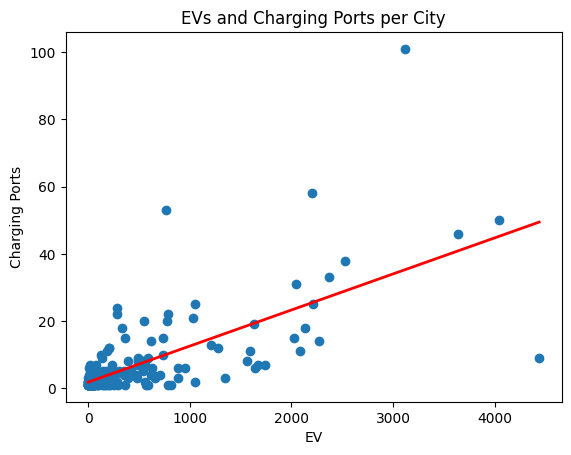

In [39]:
# Scatter Plot

plt.scatter(df.EV_Count, df.Ports_Count)
plt.xlabel('EV')
plt.ylabel('Charging Ports')
plt.title('EVs and Charging Ports per City')

# Overlay the regression line
plt.plot(df['EV_Count'], predictions, color='red', linewidth=2)
plt.show()

The correlation and model fitting is not as strong without the outliers, however, both datasets are showing signs of significant correlation.